# Reinforcement Learning - Sutton and Barto
# Exercise 5.12

Monte Carlo

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats

from WindyGridworld import windygridworld

# Windy Gridworld with King's Move

# Initialize Environment

In [2]:
env = windygridworld(king=True, stop=False, stochastic=False)

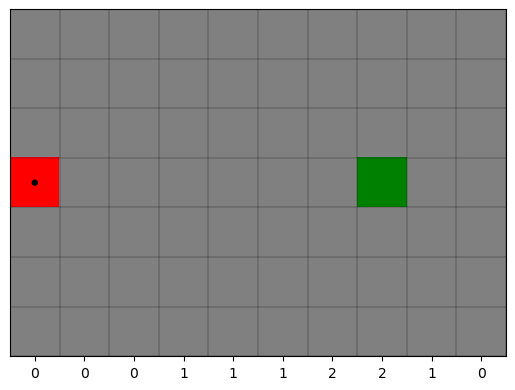

In [3]:
env.render()

## Define value table $Q(s, a)$

#### Create the $Q(s, a)$ table

In [4]:
action_values = np.zeros((env.observation_space[0],env.observation_space[1],env.action_space))

In [5]:
np.shape(action_values)

(7, 10, 8)

## Define the policy $\pi(s)$

In [6]:
def policy(state, action_values, epsilon=0.2):
    if np.random.random() < epsilon:
        return np.random.choice(env.action_space)
    else:
        av = action_values[state[0], state[1]]
        return np.argmax(av)

In [7]:
for i in range (10):
    action = policy(env.state, action_values, epsilon=0.2)
    print(f"Action taken in state {env.state} : {action}")

Action taken in state [3 0] : 0
Action taken in state [3 0] : 0
Action taken in state [3 0] : 0
Action taken in state [3 0] : 0
Action taken in state [3 0] : 0
Action taken in state [3 0] : 0
Action taken in state [3 0] : 1
Action taken in state [3 0] : 0
Action taken in state [3 0] : 0
Action taken in state [3 0] : 0


# Run Scenario

In [8]:
def run_episode(epsilon=0.2, render=True):
    steps = 0
    transitions = []

    state = env.reset()

    done = False

    while not done and (steps < 3000):
        action = policy(state, action_values, epsilon)
        next_state, reward, done = env.step(action)
        steps += 1
        transitions.append([state, action, reward])
        #print(f"State: {state}, Action: {env.action_labels[action]}, Reward: {reward}, Next State: {next_state}")
        state = next_state.copy()
        if render:
            env.render()

    #if render:
        #print(f"Steps: {steps}")
    return transitions
    

## Implement the On-Policy TD Control algorithm

In [9]:
def on_policy_td_control(action_values, policy, episodes, alpha=0.5, gamma=0.99, epsilon=0.1, render=False):
    
    steps = 0
    previous_episode = 0
        
    if render and (episodes > 10):
        render = False
        print(f"Too many episodes to render!")
    
    for episode in range(1, episodes + 1):
    
        state = env.reset()
        
        action = policy(state, action_values, epsilon)
        
        done = False

        while not done:
            next_state, reward, done = env.step(action)
            next_action = policy(next_state, action_values, epsilon)
            
            qsa = action_values[state[0]][state[1]][action]
            
            if not done:
                next_qsa = action_values[next_state[0]][next_state[1]][next_action]
            else:
                next_qsa = 0
                
            action_values[state[0]][state[1]][action] = qsa + alpha * (reward + gamma * next_qsa - qsa)
            
            state = next_state.copy()
            action = next_action
            steps += 1
                                                               
        if (episode % (episodes/10) == 0):
            print(f"Episode: {episode} Finished | Average Steps: {steps/(episode - previous_episode)}")
            steps = 0
            previous_episode = episode

In [10]:
on_policy_td_control(action_values, policy, 500)

Episode: 50 Finished | Average Steps: 105.06
Episode: 100 Finished | Average Steps: 20.82
Episode: 150 Finished | Average Steps: 10.2
Episode: 200 Finished | Average Steps: 16.3
Episode: 250 Finished | Average Steps: 15.38
Episode: 300 Finished | Average Steps: 10.6
Episode: 350 Finished | Average Steps: 15.28
Episode: 400 Finished | Average Steps: 13.4
Episode: 450 Finished | Average Steps: 15.62
Episode: 500 Finished | Average Steps: 28.02


In [11]:
for row in range(7):
    for col in range (10):
        action = policy(np.array([row, col]), action_values, epsilon=0.)
        print(f"Action for state ({row}, {col}): {env.action_labels[action]}")

Action for state (0, 0): up
Action for state (0, 1): down_right
Action for state (0, 2): right
Action for state (0, 3): up
Action for state (0, 4): up
Action for state (0, 5): up
Action for state (0, 6): up
Action for state (0, 7): up
Action for state (0, 8): up
Action for state (0, 9): up-left
Action for state (1, 0): up-right
Action for state (1, 1): right
Action for state (1, 2): down_right
Action for state (1, 3): down_right
Action for state (1, 4): down_right
Action for state (1, 5): down_right
Action for state (1, 6): up
Action for state (1, 7): up
Action for state (1, 8): left
Action for state (1, 9): down_left
Action for state (2, 0): right
Action for state (2, 1): down_right
Action for state (2, 2): down
Action for state (2, 3): down_right
Action for state (2, 4): down_right
Action for state (2, 5): down_left
Action for state (2, 6): down_right
Action for state (2, 7): up
Action for state (2, 8): down_left
Action for state (2, 9): down_right
Action for state (3, 0): down_right

Test Agent

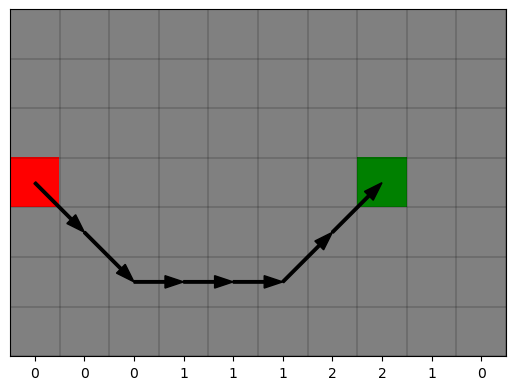

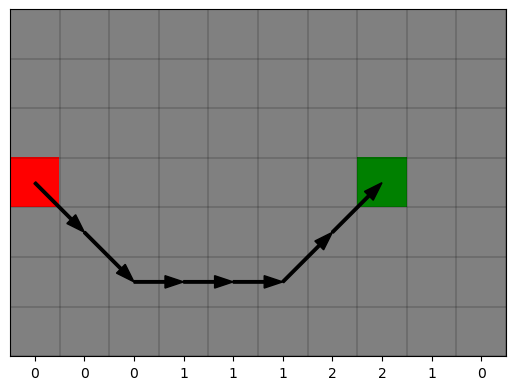

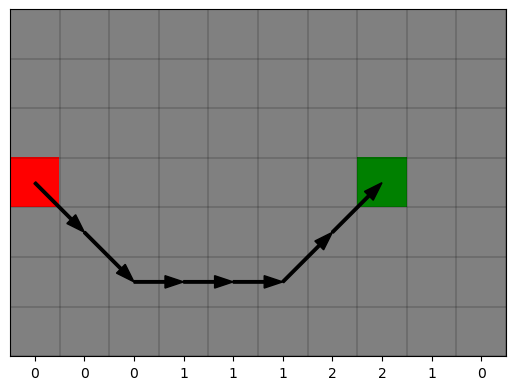

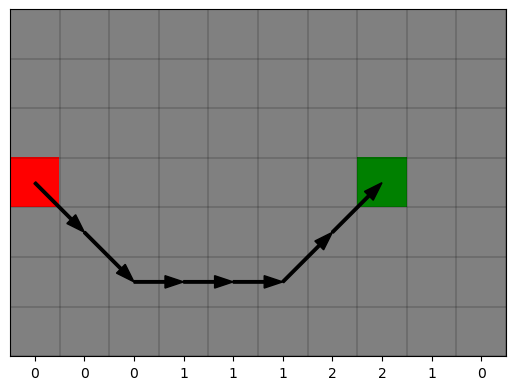

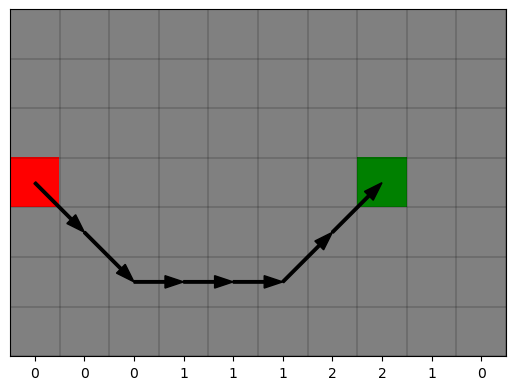

In [12]:
for a in range(5):
    run_episode(epsilon=0.)

In [13]:
matplotlib.rcParams['figure.figsize'] = [10, 10]


def plot_results(env, qsa, policy):
    fig = plt.figure()
    ax = fig.gca()
    ax.set_title("Optimal Value Function and Policy")
    
    qsa = np.copy(qsa)
    unvisited = np.where(qsa == 0)
    v = np.max(qsa, axis=2).reshape(env.observation_space)
    ax.imshow(v, origin='lower')

    xr = []
    yr = []
    
    actions = np.argmax(qsa,axis=2)
    arrows = np.empty((np.shape(actions)[0], np.shape(actions)[1],2))
    for row in range(len(actions)):
        for col in range(len(actions[row])):
            arrows[row][col][0] = env.actions[actions[row][col]][0]
            arrows[row][col][1] = env.actions[actions[row][col]][1]
            yr.append(row)
            xr.append(col)
    ax.quiver(xr, yr, arrows[:, :, 1], arrows[:, :, 0], pivot='mid')

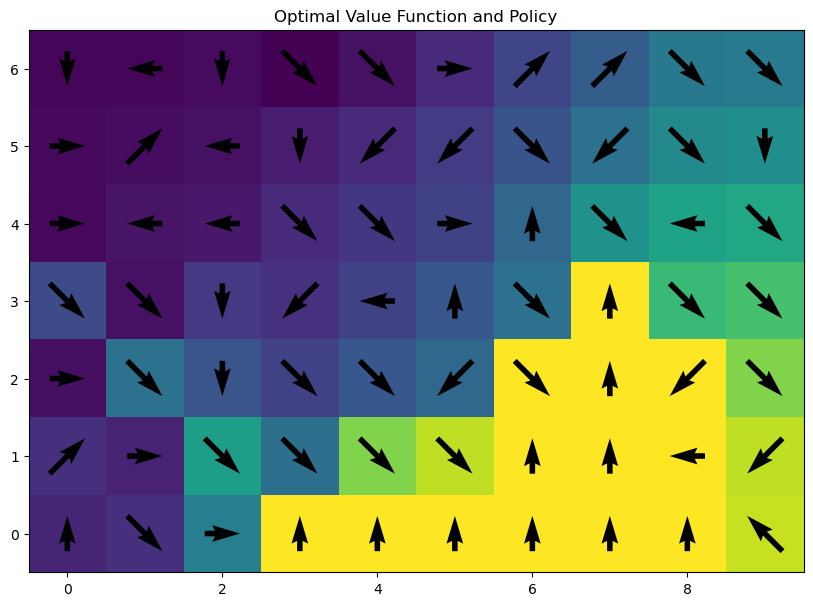

In [14]:
plot_results(env, action_values, policy)

# WIndy Gridworld with King's Move and Stop

In [15]:
env = windygridworld(king=True, stop=True, stochastic=False)

In [16]:
action_values = np.zeros((env.observation_space[0],env.observation_space[1],env.action_space))

In [17]:
on_policy_td_control(action_values, policy, 500)

Episode: 50 Finished | Average Steps: 115.6
Episode: 100 Finished | Average Steps: 24.74
Episode: 150 Finished | Average Steps: 25.42
Episode: 200 Finished | Average Steps: 12.78
Episode: 250 Finished | Average Steps: 25.66
Episode: 300 Finished | Average Steps: 18.26
Episode: 350 Finished | Average Steps: 13.66
Episode: 400 Finished | Average Steps: 11.7
Episode: 450 Finished | Average Steps: 13.86
Episode: 500 Finished | Average Steps: 13.04


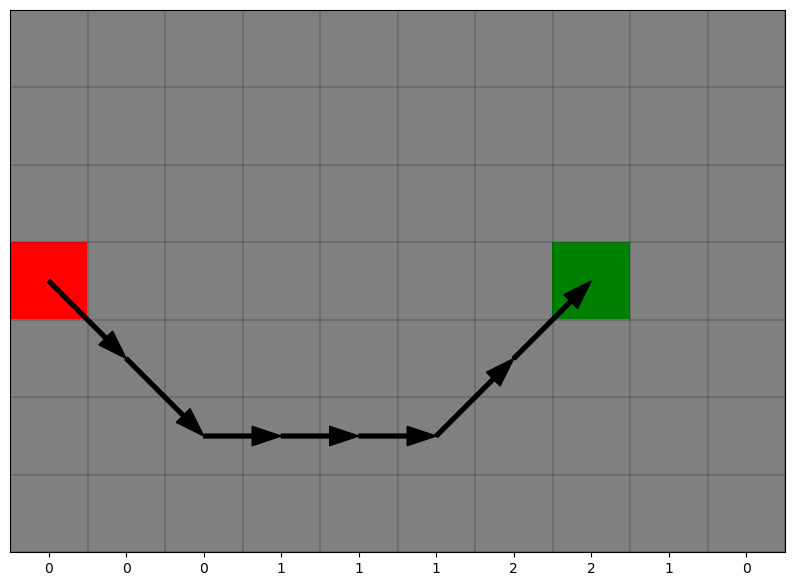

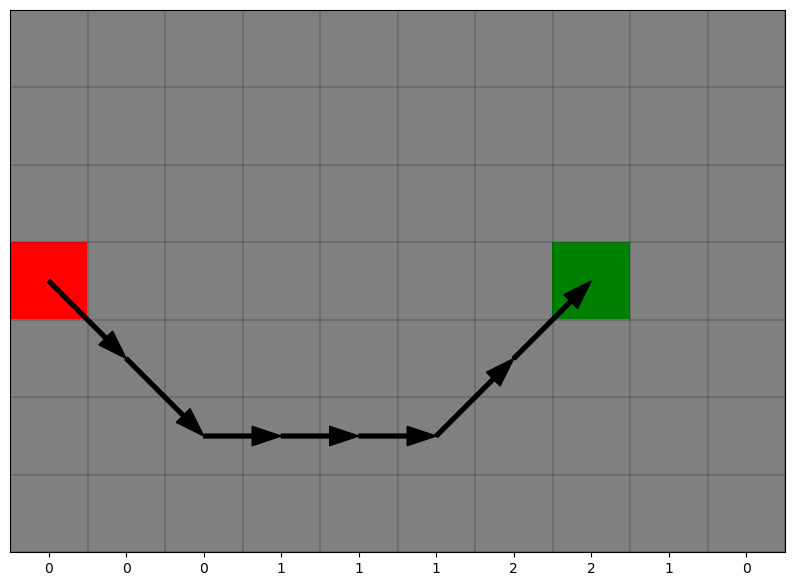

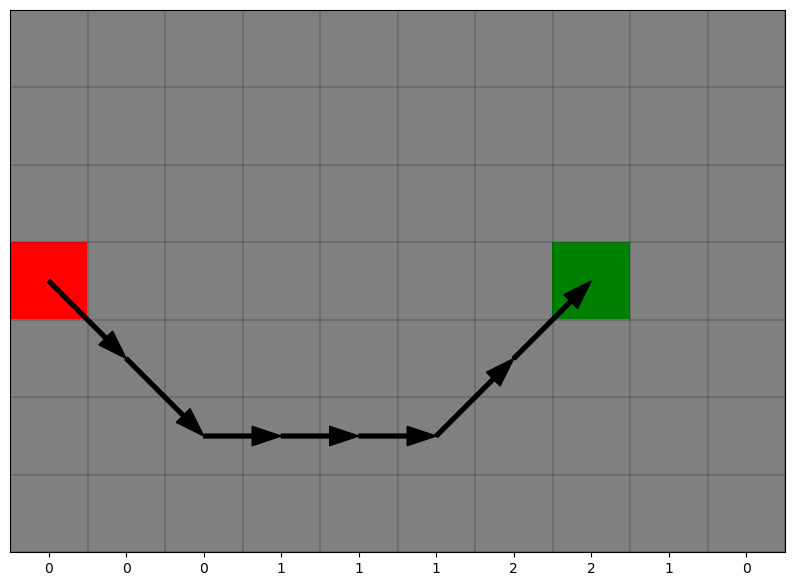

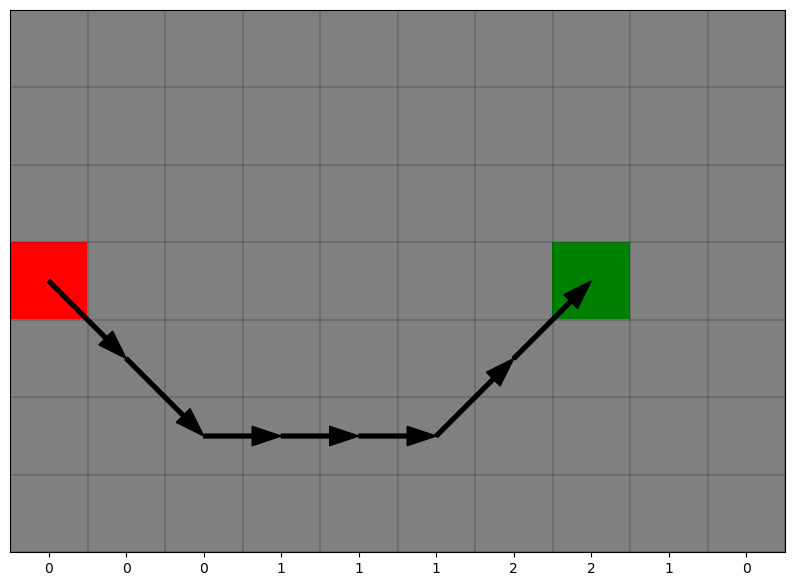

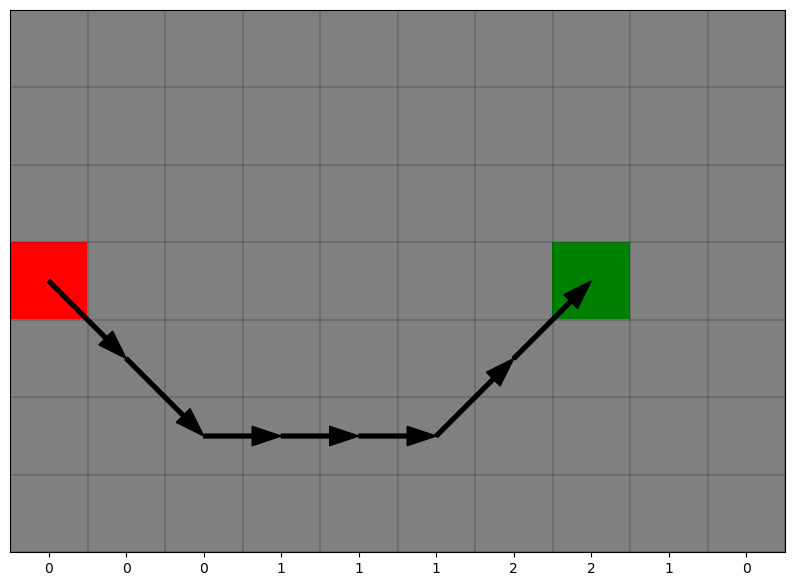

In [18]:
for a in range(5):
    run_episode(epsilon=0.)

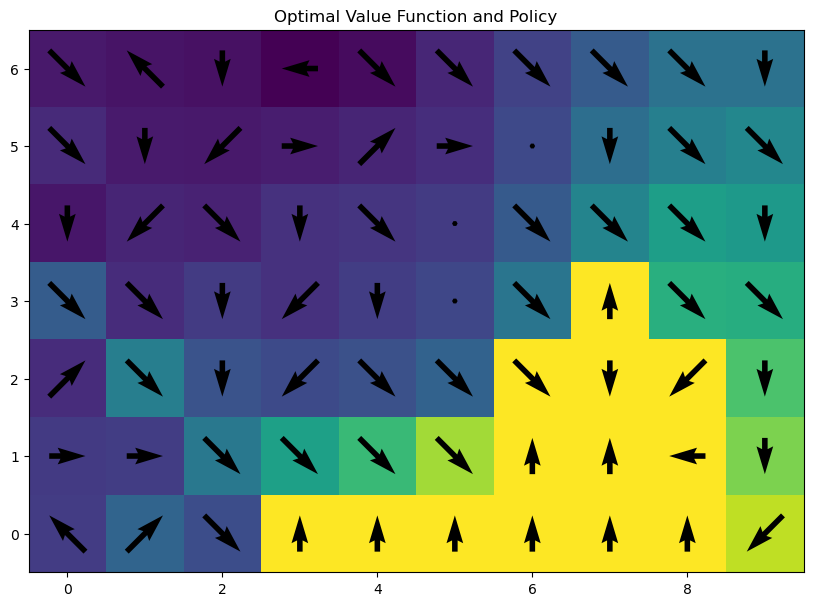

In [19]:
plot_results(env, action_values, policy)

# WIndy Gridworld with King's Move and Stop and Stochastics

In [20]:
env = windygridworld(king=True, stop=True, stochastic=True)

In [21]:
action_values = np.zeros((env.observation_space[0],env.observation_space[1],env.action_space))

In [22]:
on_policy_td_control(action_values, policy, 500)

Episode: 50 Finished | Average Steps: 243.66
Episode: 100 Finished | Average Steps: 113.84
Episode: 150 Finished | Average Steps: 46.86
Episode: 200 Finished | Average Steps: 73.96
Episode: 250 Finished | Average Steps: 57.74
Episode: 300 Finished | Average Steps: 56.84
Episode: 350 Finished | Average Steps: 47.6
Episode: 400 Finished | Average Steps: 45.76
Episode: 450 Finished | Average Steps: 41.0
Episode: 500 Finished | Average Steps: 44.4


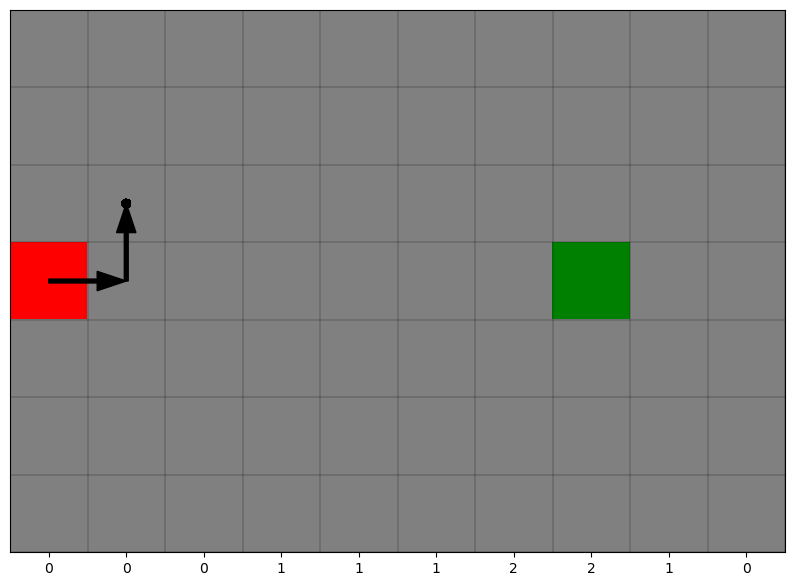

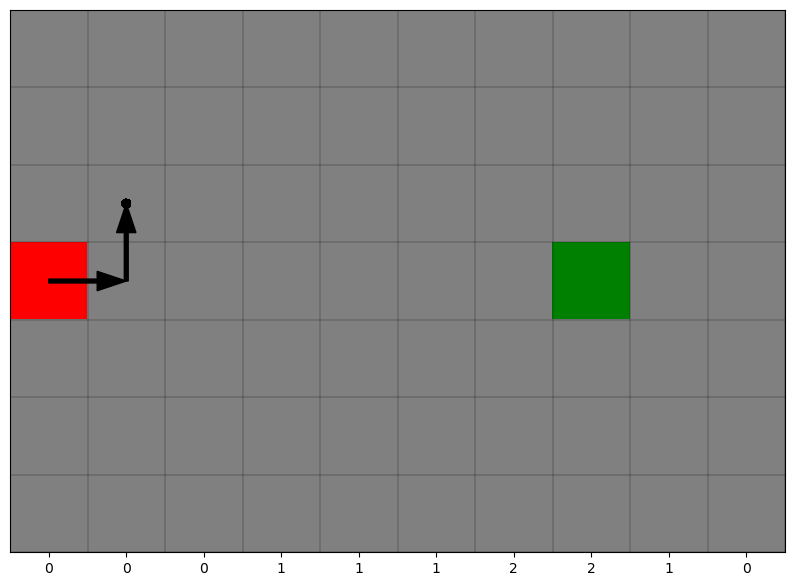

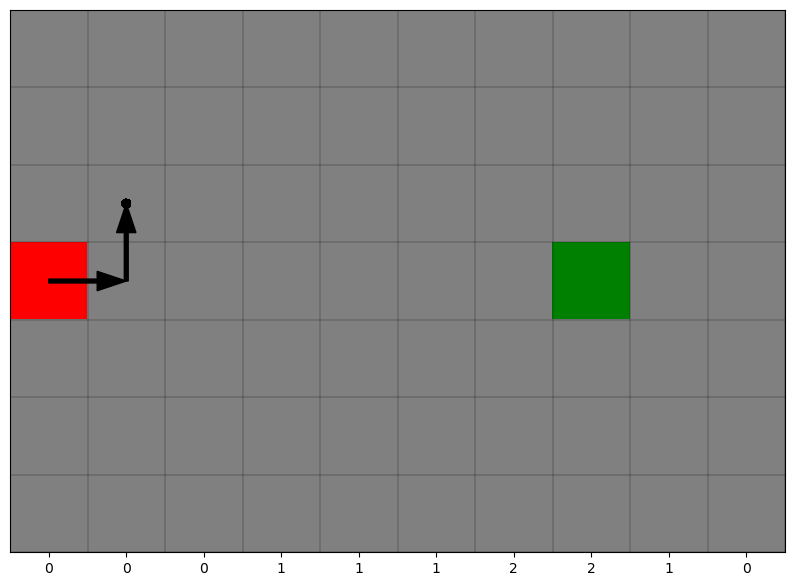

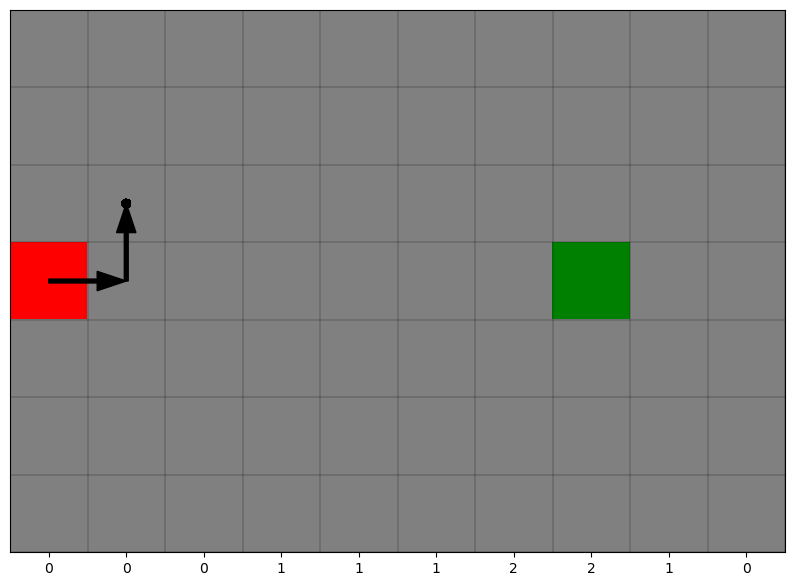

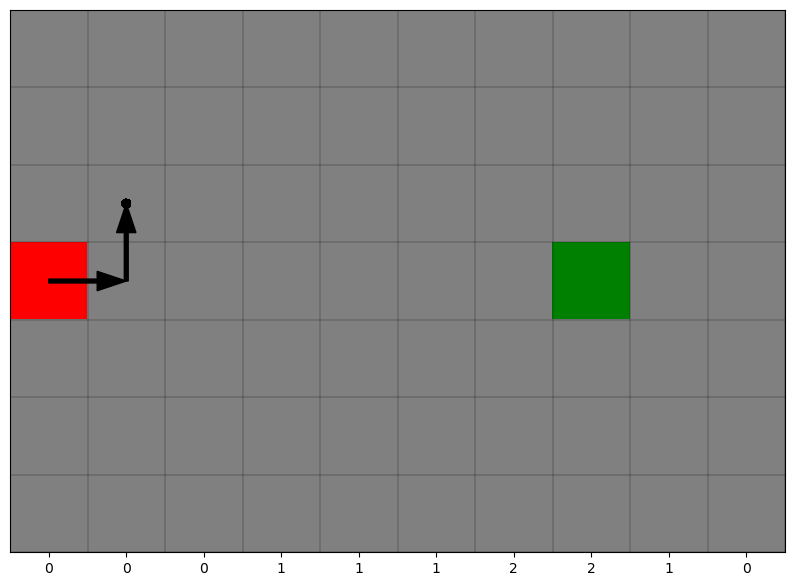

In [23]:
for a in range(5):
    run_episode(epsilon=0.)

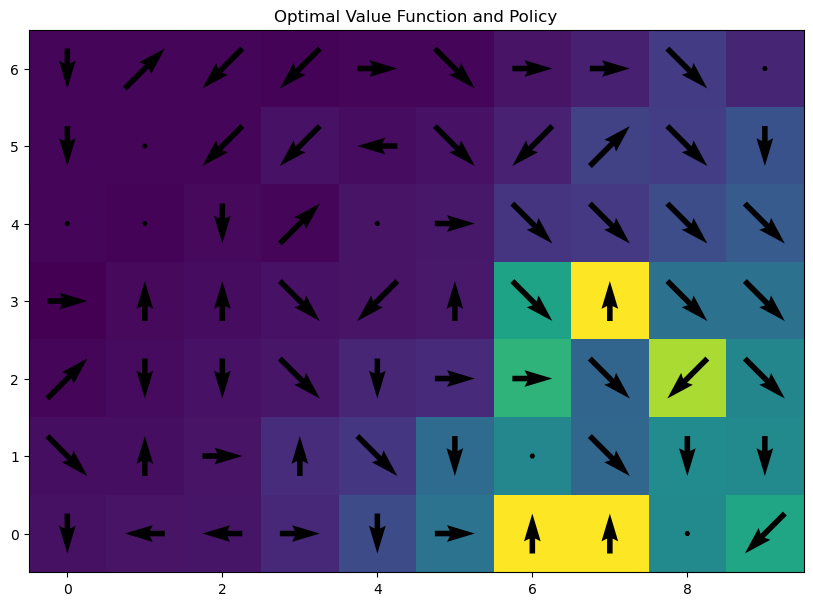

In [24]:
plot_results(env, action_values, policy)